<a href="https://colab.research.google.com/github/Rohan5076/AIMLOPS/blob/main/Group5_MiniProject_1_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/wa_fn_usec_hr_employee_attrition_tsv.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Install Required Dependencies

In [ ]:
# Install CatBoost
!pip -qq install catboost

### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

Please refer to the [ReadMe](https://drive.google.com/file/d/1V5CAUlRwLNcQcIWfgCJhukYvRESi2cC2/view?usp=sharing) before proceeding further.

# Part-A

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
df = pd.read_csv('/content/wa_fn_usec_hr_employee_attrition_tsv.csv')

In [ ]:
# Check the shape of dataframe.
df.shape

(1470, 35)

## Data Exploration

- Check for missing values
- Check for features having consistent data across samples
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:**
>Use `for` to iterate through each column.

>For statistical description display - samples count, missing values count, range, and data type of each feature.

In [ ]:
# Separate numerical and categorical columns
#numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
#categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_cols = [x for x in df.columns if pd.api.types.is_numeric_dtype(df[x])]
categorical_cols = [x for x in df.columns if pd.api.types.is_object_dtype(df[x])]

In [ ]:
# Display statistical description
# df.describe()
#df.describe().loc[['min', 'max', 'mean', 'std']].round(2)

In [ ]:
from tabulate import tabulate

# Create a list to store the statistics
stats = []

# Iterating through each column
i=0
for col in numerical_cols:
    SNo = i+1
    missing_values = df[col].isnull().sum()
    sample_count = df[col].count()
    data_type = df[col].dtype
    column_range = df[col].min(), df[col].max()
    stats.append([SNo, col, sample_count, missing_values, data_type, column_range])
    i = SNo



# Display the statistics in tabular format
print("\nStatistical Description of each Feature:")
print(tabulate(stats, headers=["SNo", "Column", "Sample Count", "Missing Values Count", "Data Type", "Range"]))



Statistical Description of each Feature:
  SNo  Column                      Sample Count    Missing Values Count  Data Type    Range
-----  ------------------------  --------------  ----------------------  -----------  -------------
    1  age                                 1470                       0  int64        (18, 60)
    2  dailyrate                           1470                       0  int64        (102, 1499)
    3  distancefromhome                    1470                       0  int64        (1, 29)
    4  education                           1470                       0  int64        (1, 5)
    5  employeecount                       1470                       0  int64        (1, 1)
    6  employeenumber                      1470                       0  int64        (1, 2068)
    7  environmentsatisfaction             1470                       0  int64        (1, 4)
    8  hourlyrate                          1470                       0  int64        (30, 100)
    9  j

In [ ]:
from tabulate import tabulate

# Create a list to store the statistics
stats = []

# Iterating through each column
i=0
for col in categorical_cols:
    SNo=i+1
    missing_values = df[col].isnull().sum()
    sample_count = df[col].count()
    data_type = df[col].dtype
    column_range = df[col].min(), df[col].max()
    stats.append([SNo, col, sample_count, missing_values, data_type, column_range])
    i=SNo

# Display the statistics in tabular format
print("\nStatistical Description of each Feature:")
print(tabulate(stats, headers=["SNo", "Column", "Sample Count", "Missing Values Count", "Data Type", "Range"]))


Statistical Description of each Feature:
  SNo  Column            Sample Count    Missing Values Count  Data Type    Range
-----  --------------  --------------  ----------------------  -----------  -----------------------------------------------------
    1  attrition                 1470                       0  object       ('No', 'Yes')
    2  businesstravel            1470                       0  object       ('Non-Travel', 'Travel_Rarely')
    3  department                1470                       0  object       ('Human Resources', 'Sales')
    4  educationfield            1470                       0  object       ('Human Resources', 'Technical Degree')
    5  gender                    1470                       0  object       ('Female', 'Male')
    6  jobrole                   1470                       0  object       ('Healthcare Representative', 'Sales Representative')
    7  maritalstatus             1470                       0  object       ('Divorced', 'Single')
   

In [ ]:
#Remove missing values
df.dropna(inplace=True)

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

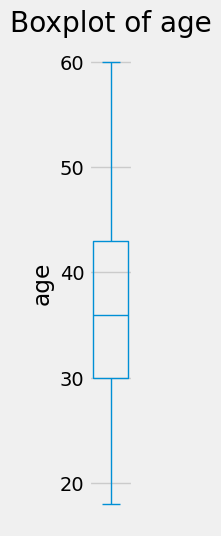

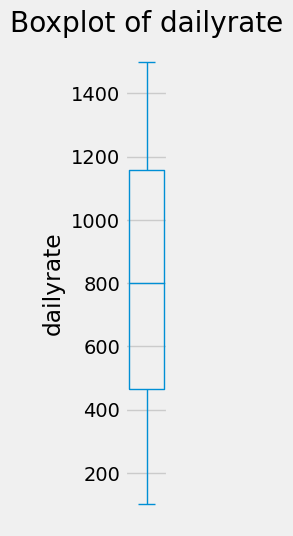

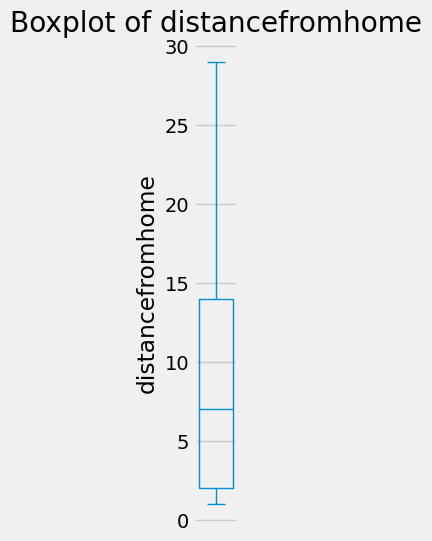

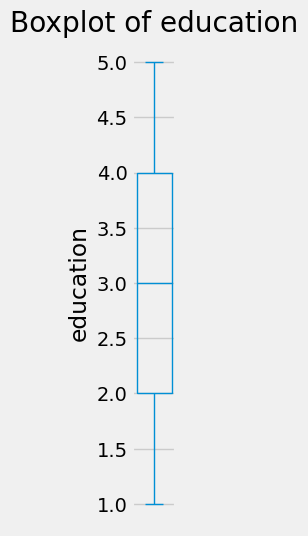

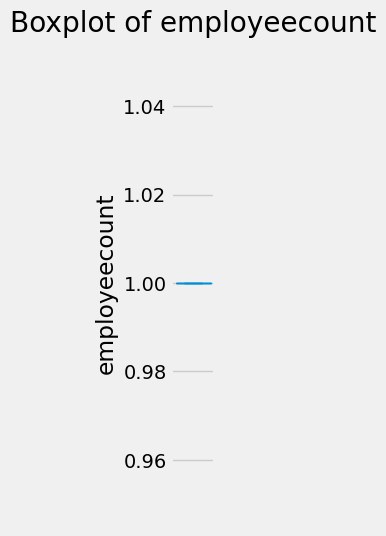

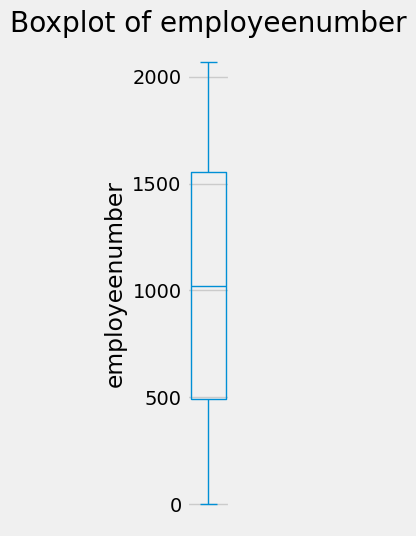

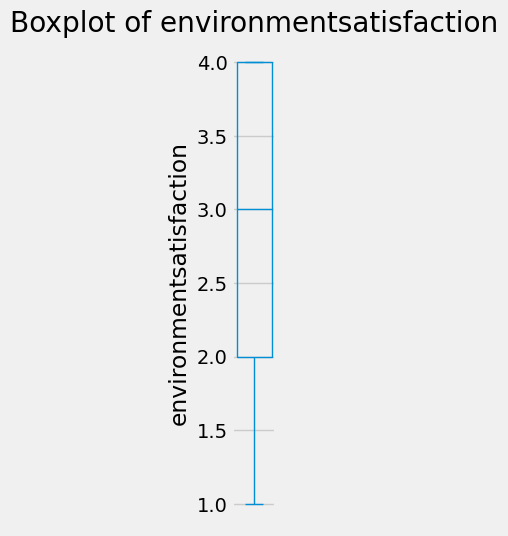

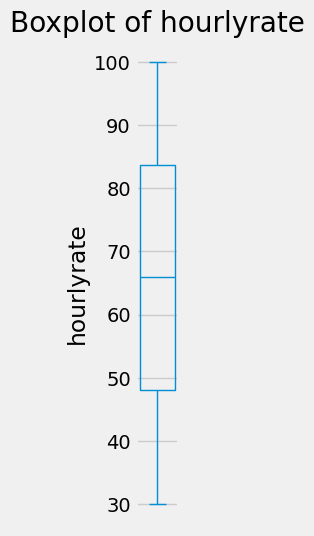

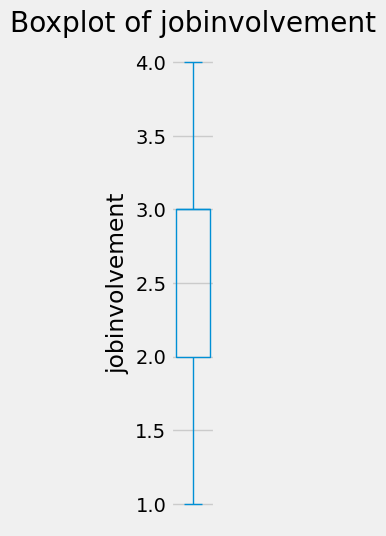

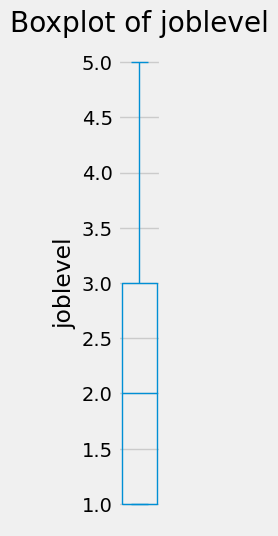

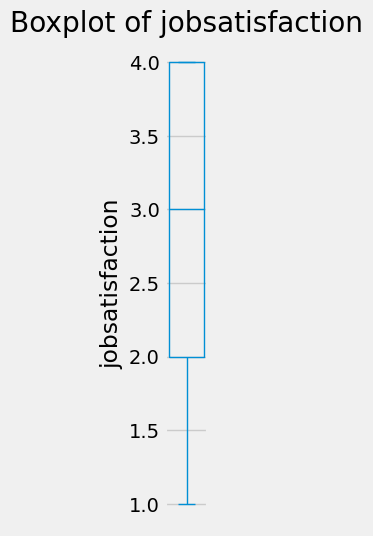

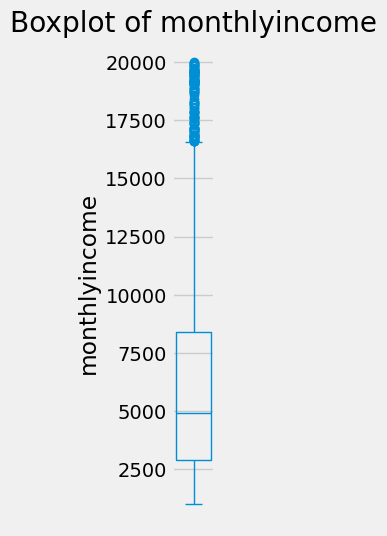

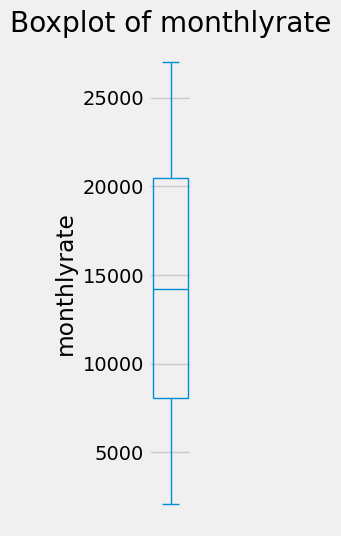

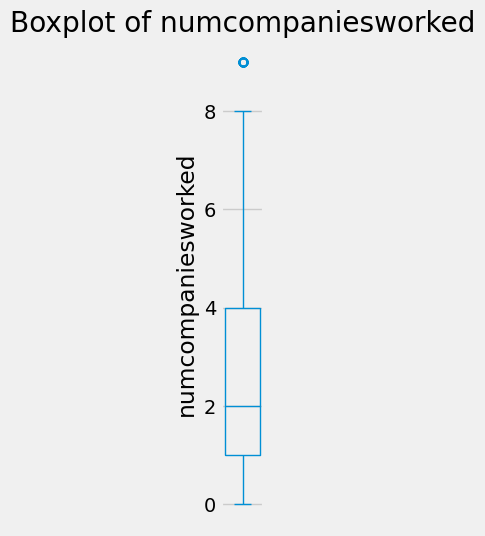

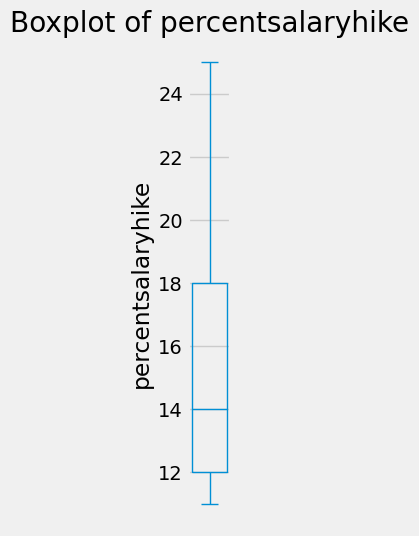

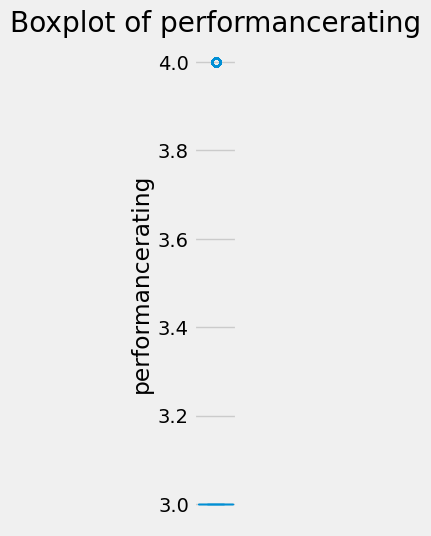

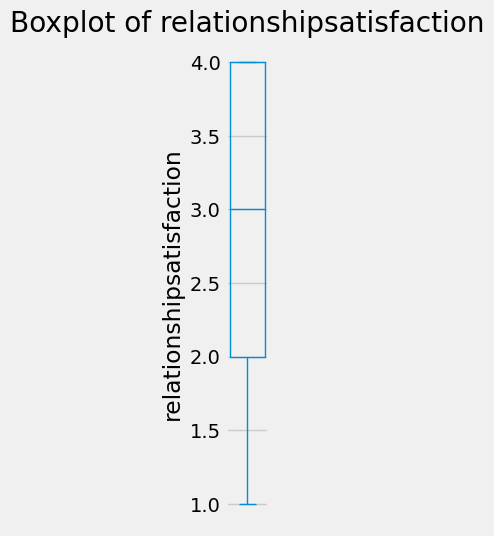

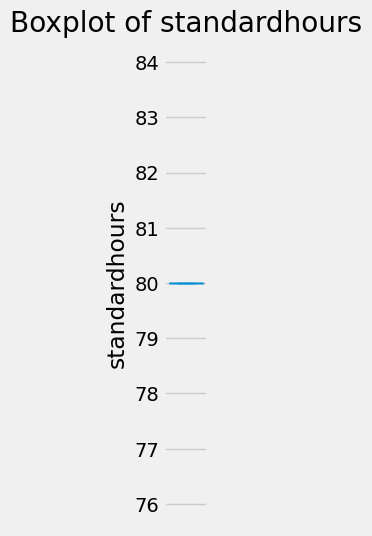

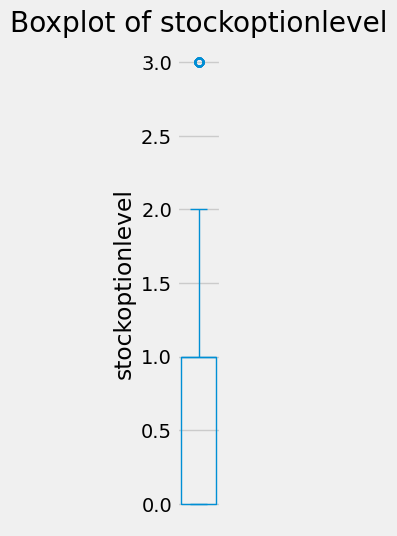

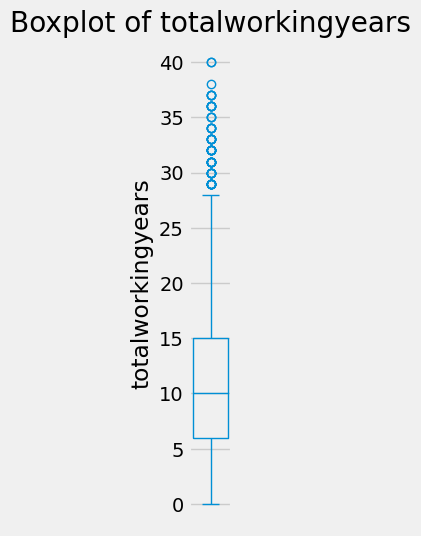

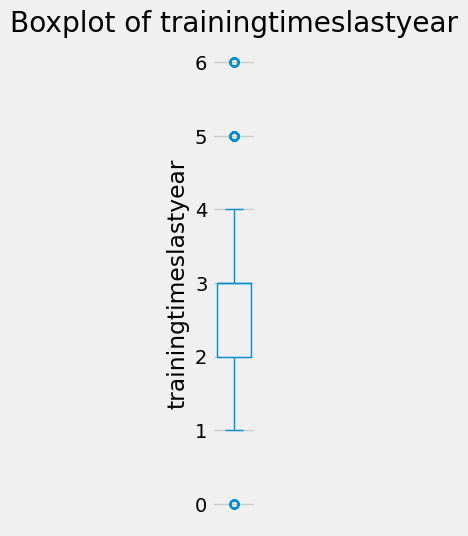

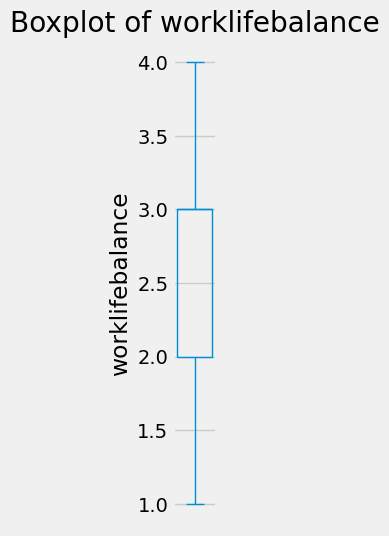

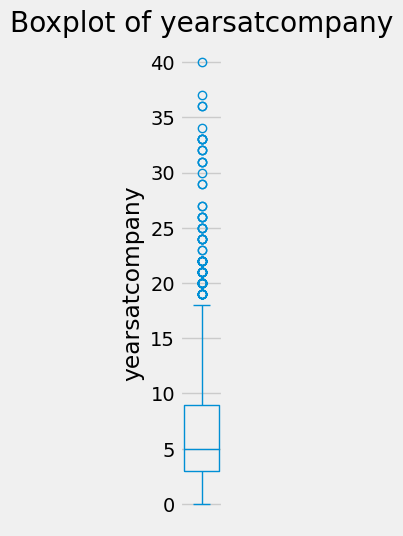

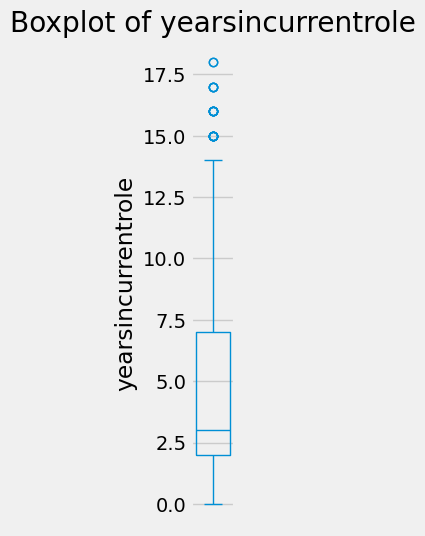

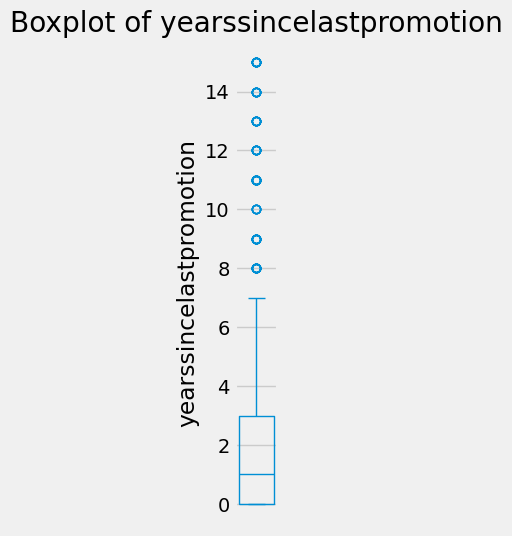

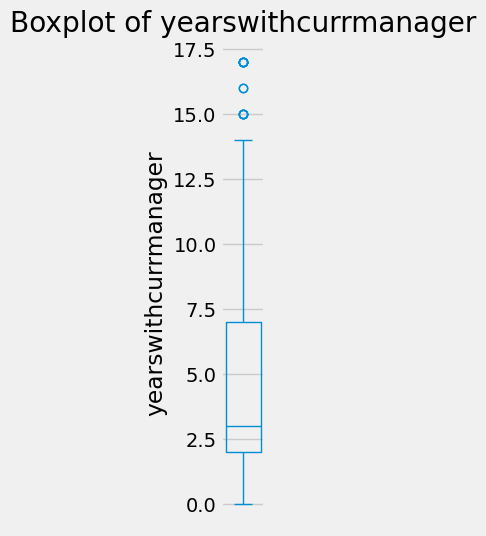

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(.5, 6))
    sns.boxplot(y=df[col], orient='h' , fill=False, linewidth=1)
    plt.title(f"Boxplot of {col}")
    #plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
    plt.show()

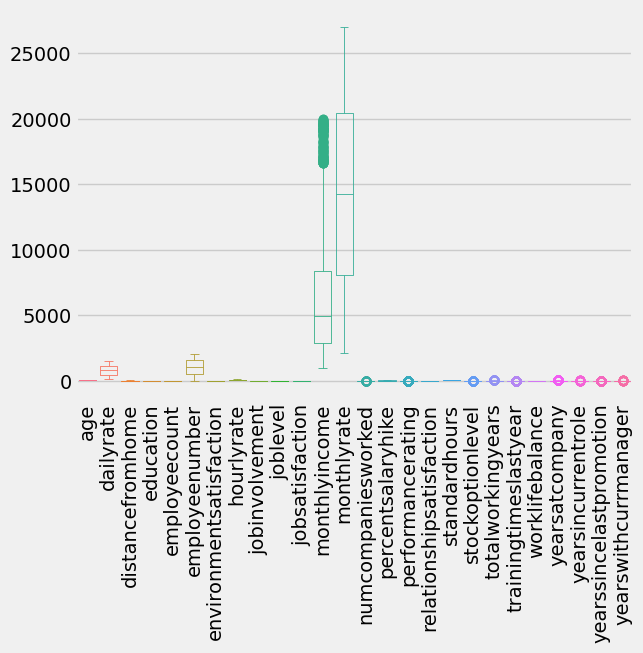

In [ ]:
# Check for outliers
sns.boxplot(data=df,orient='v',fill=False, linewidth=.6)
plt.xticks(rotation=90)
plt.show()

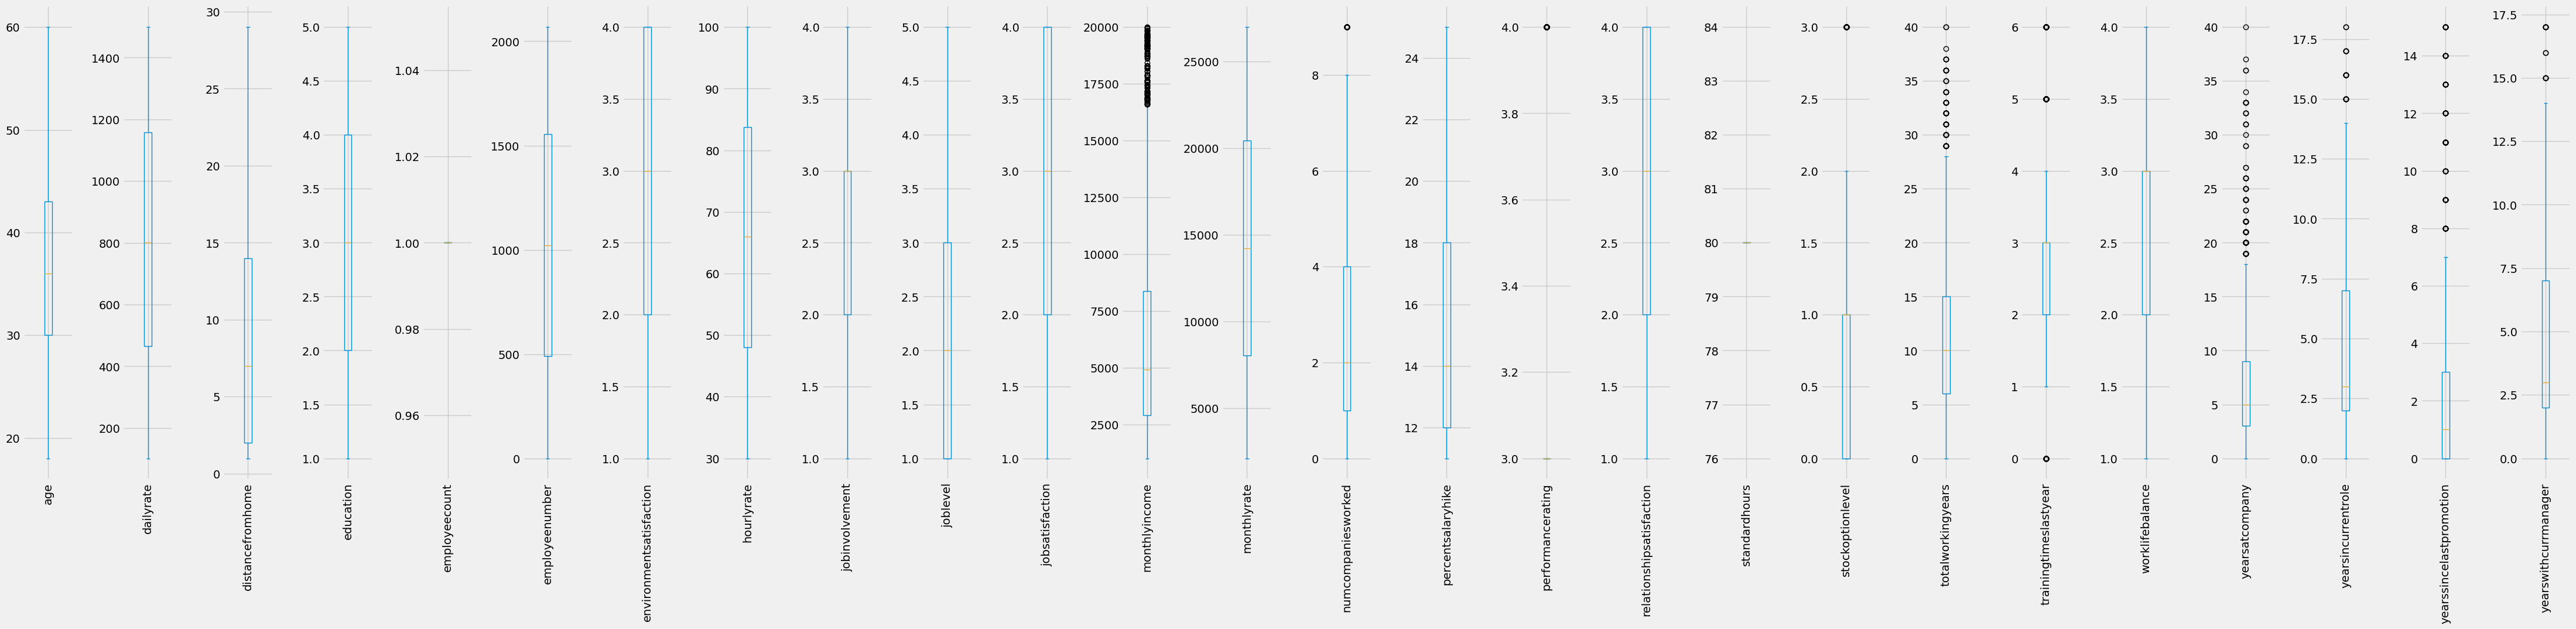

In [ ]:
df.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(50, 10),
    rot=90
)

# increase spacing between subplots
plt.subplots_adjust(wspace=1.0)
plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
#numeric_columns = df.select_dtypes(include='number').columns

# Iterate through each numerical column and find outliers
outliers = {}
for col in numerical_cols:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Find outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print the outliers for each numerical column
print("Outliers : ")
for col, outlier_values in outliers.items():
  if not outlier_values.empty:
    print(f"'{col}': {outlier_values.tolist()}")

Outliers : 
'monthlyincome': [19094, 18947, 19545, 18740, 18844, 18172, 17328, 16959, 19537, 17181, 19926, 19033, 18722, 19999, 16792, 19232, 19517, 19068, 19202, 19436, 16872, 19045, 19144, 17584, 18665, 17068, 19272, 18300, 16659, 19406, 19197, 19566, 18041, 17046, 17861, 16835, 16595, 19502, 18200, 16627, 19513, 19141, 19189, 16856, 19859, 18430, 17639, 16752, 19246, 17159, 17924, 17099, 17444, 17399, 19419, 18303, 19973, 19845, 17650, 19237, 19627, 16756, 17665, 16885, 17465, 19626, 19943, 18606, 17048, 17856, 19081, 17779, 19740, 18711, 18265, 18213, 18824, 18789, 19847, 19190, 18061, 17123, 16880, 17861, 19187, 19717, 16799, 17328, 19701, 17169, 16598, 17007, 16606, 19586, 19331, 19613, 17567, 19049, 19658, 17426, 17603, 16704, 19833, 19038, 19328, 19392, 19665, 16823, 17174, 17875, 19161, 19636, 19431, 18880]
'numcompaniesworked': [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [ ]:
from scipy import stats
# Z-score
outliers = {}
for col in numerical_cols:
    z_scores = stats.zscore(df[col])
    threshold = 2  # Define the threshold for Z-score (commonly 2 or 3)
    outlier_mask = abs(z_scores) > threshold
    outliers[col] = df[outlier_mask][col]


for col, outlier_values in outliers.items():
  if len(outlier_values) > 0 :
    print(f"'{col}': {outlier_values.tolist()}")

'age': [59, 59, 59, 56, 58, 59, 56, 58, 58, 57, 56, 59, 59, 18, 18, 58, 57, 56, 60, 57, 60, 18, 60, 56, 58, 58, 58, 58, 18, 59, 59, 56, 18, 56, 60, 59, 59, 58, 56, 58, 18, 56, 58, 56, 57, 18, 60, 58, 58, 18, 56, 56, 58, 56, 56]
'distancefromhome': [27, 26, 29, 26, 26, 28, 28, 29, 26, 27, 29, 29, 27, 26, 26, 29, 29, 26, 28, 26, 29, 29, 28, 29, 29, 28, 28, 29, 28, 26, 28, 27, 26, 27, 27, 29, 26, 27, 29, 28, 29, 26, 29, 28, 27, 29, 26, 29, 29, 26, 28, 26, 29, 26, 28, 28, 29, 29, 28, 28, 28, 28, 29, 26, 28, 27, 26, 26, 27, 26, 26, 28, 29, 27, 29, 27, 26, 29, 26, 26, 29, 29, 28, 28, 26, 28, 28]
'education': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
'jobinvolvement': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Recheck for outliers
# YOUR CODE HERE

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
print(df.attrition.unique())

['Yes' 'No']


In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE

Number of employees who left: 237
Number of employees who stayed: 1233


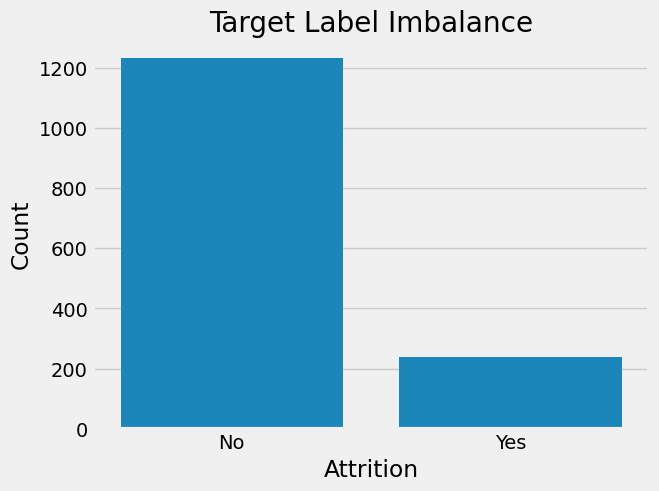

In [ ]:
# Check for target label imbalance
target_count = df['attrition'].value_counts()
print(f"Number of employees who left: {target_count['Yes']}")
print(f"Number of employees who stayed: {target_count['No']}")

# Plot barplot to visualize balance/imbalance
sns.barplot(x=target_count.index, y=target_count.values)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Target Label Imbalance")
plt.show()

# If there is an imbalance, you can use techniques such as SMOTE, cross-validation, or regularizing the model's parameters to address it.


If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [ ]:
numerical_cols

['age',
 'dailyrate',
 'distancefromhome',
 'education',
 'employeecount',
 'employeenumber',
 'environmentsatisfaction',
 'hourlyrate',
 'jobinvolvement',
 'joblevel',
 'jobsatisfaction',
 'monthlyincome',
 'monthlyrate',
 'numcompaniesworked',
 'percentsalaryhike',
 'performancerating',
 'relationshipsatisfaction',
 'standardhours',
 'stockoptionlevel',
 'totalworkingyears',
 'trainingtimeslastyear',
 'worklifebalance',
 'yearsatcompany',
 'yearsincurrentrole',
 'yearssincelastpromotion',
 'yearswithcurrmanager']

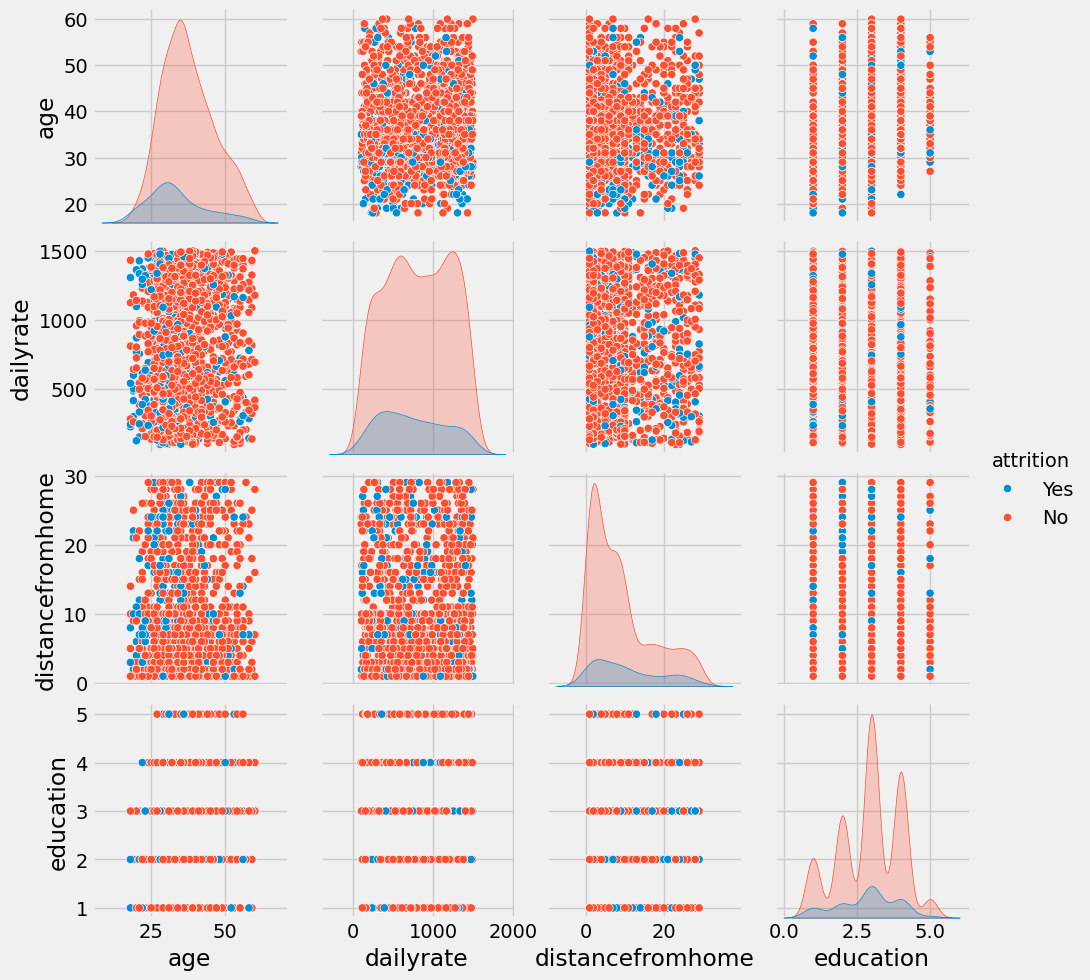

In [ ]:
# prompt: Visualize a pairplot with relevant features using sns.pairplot

# Create pairplot with hue as attrition
sns.pairplot(data=df[['age',
 'dailyrate','distancefromhome',
 'education','attrition']], hue='attrition')
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

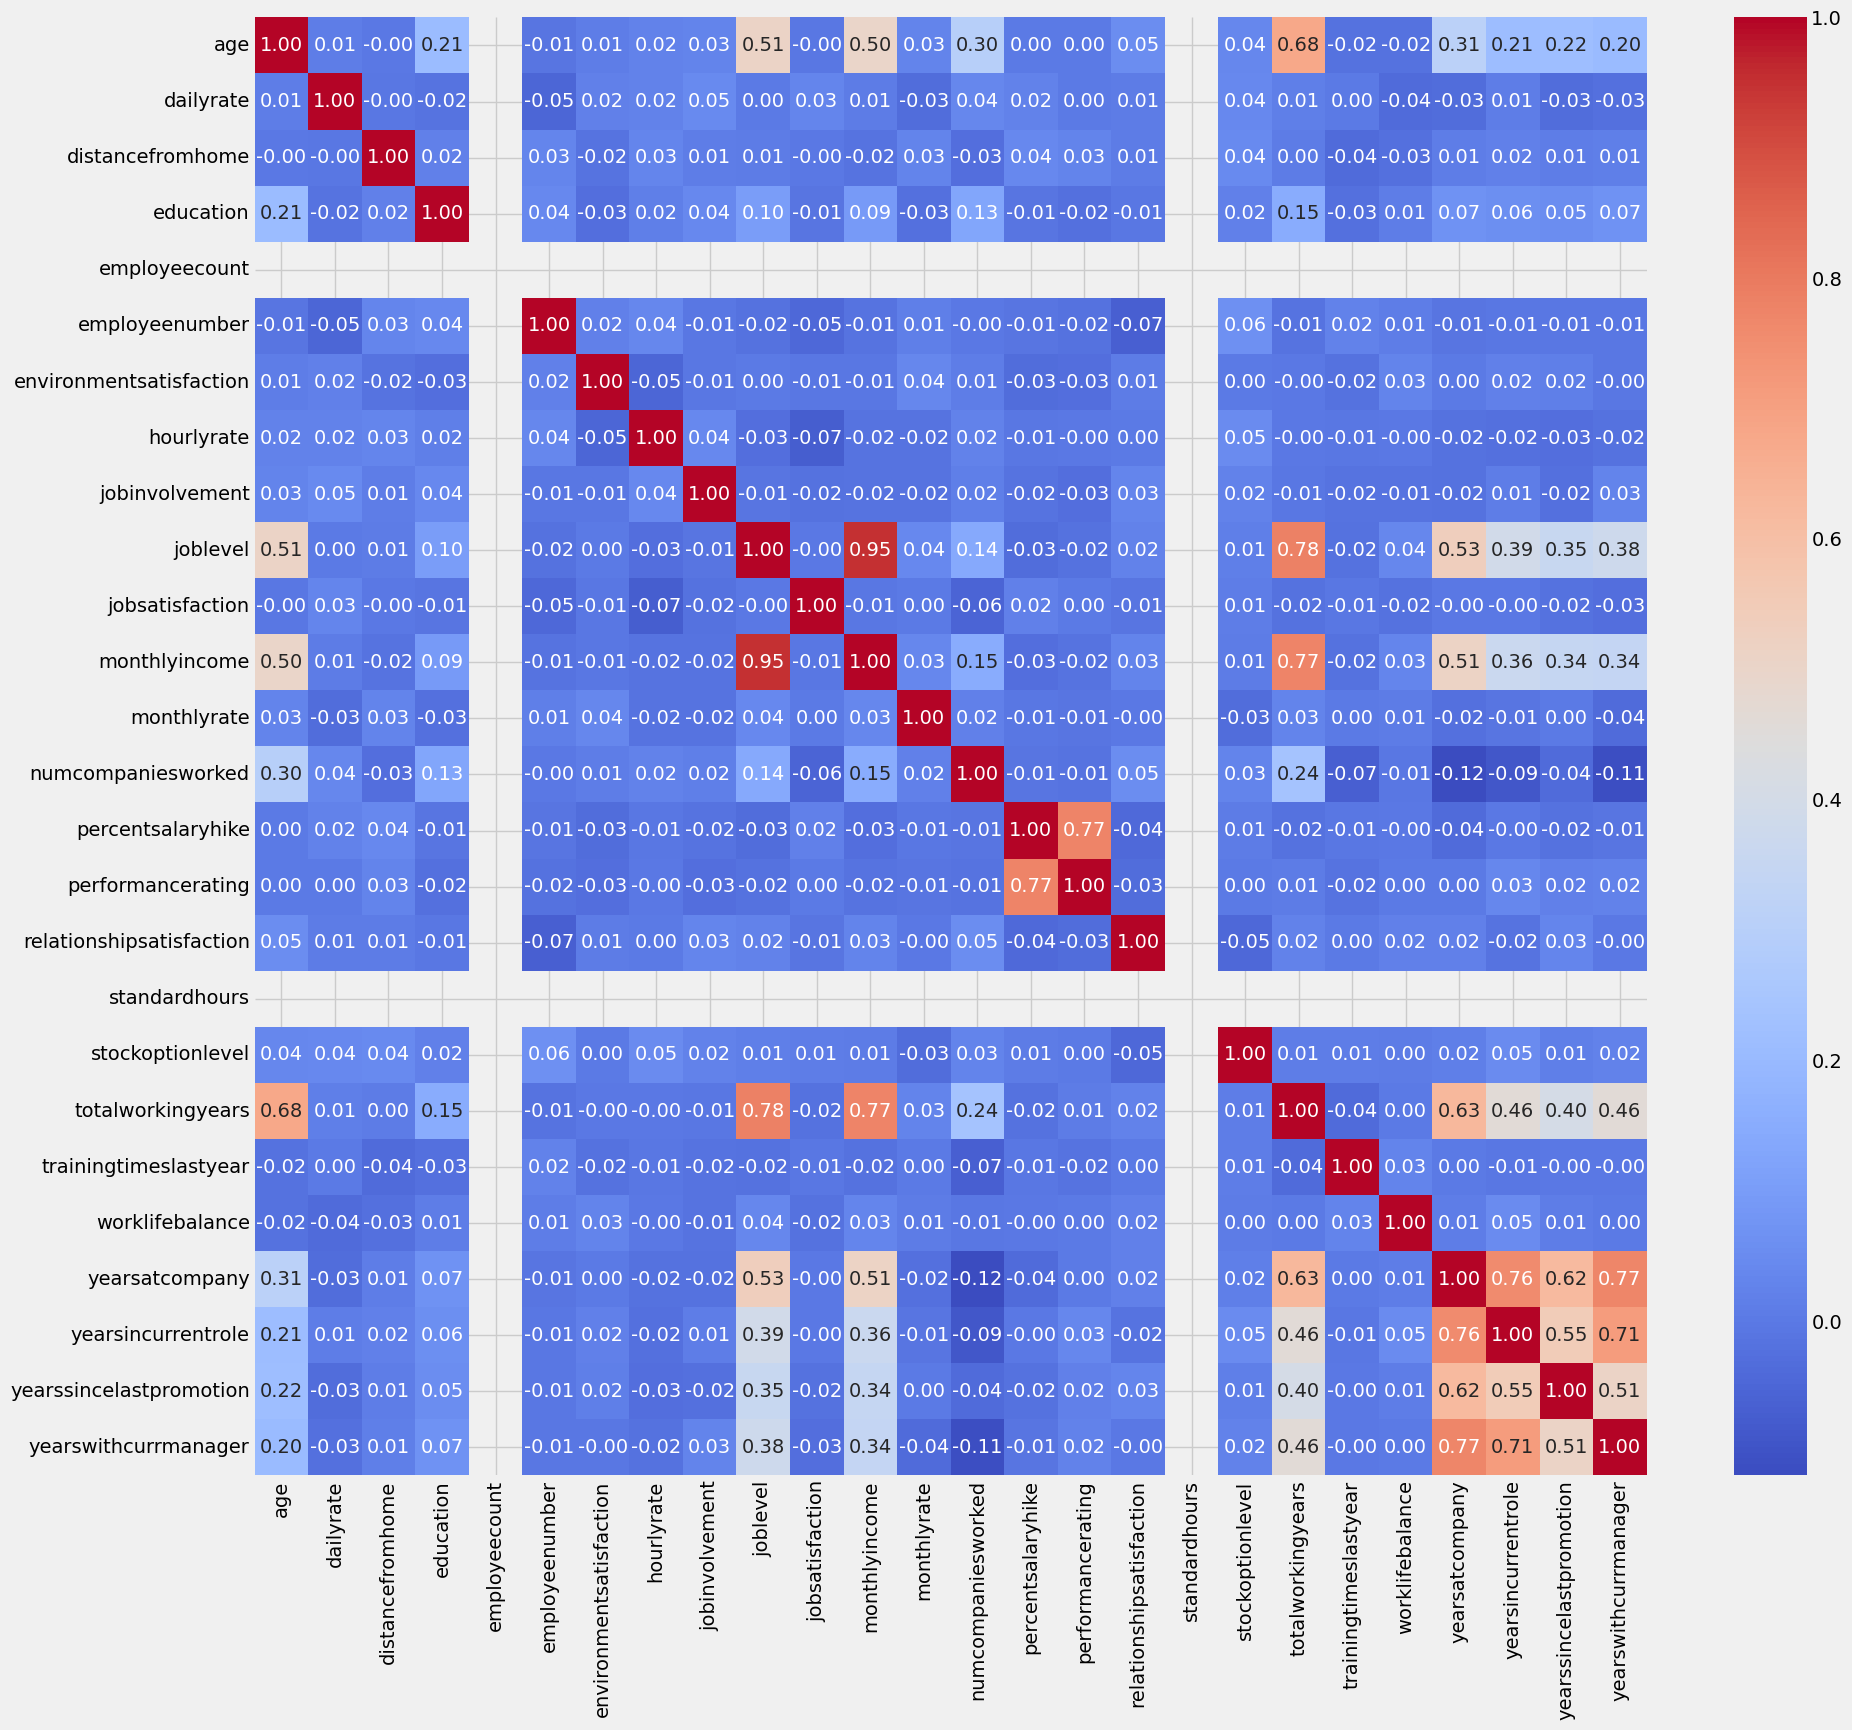

In [ ]:
# Visualize heatmap
# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Comment on the observations made with the pairplot and heatmap

# Part-B

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
#Remove outliers
clean_df= df

for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  #print("Value", df[col])
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  #print ("lower", lower_bound,"Upper", upper_bound, "Value", )
  clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

In [ ]:
clean_df.shape

(779, 35)

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
clean_df1 = clean_df.copy()

In [ ]:
# Target Column
y=clean_df1['attrition']

In [ ]:
# Feature Space
X=clean_df1.drop('attrition',axis=1)

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create CatBoost model

X_train, X_test, y_train, y_test = train_test_split(clean_df1.drop('attrition',axis=1),    # predictors
                                                    clean_df1.attrition,                    # target
                                                    test_size=0.2,
                                                    random_state=0, stratify= y)                    # for reproducibility

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((623, 34), (156, 34), (623,), (156,))

In [ ]:
#categorical_cols.remove('attrition')

model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, cat_features=categorical_cols,
                           loss_function='Logloss', custom_metric=['AUC'], random_seed=42)

In [ ]:
# Model training
model.fit(X_train, y_train, categorical_cols)

0:	learn: 0.6336832	total: 4.83ms	remaining: 478ms
1:	learn: 0.5812541	total: 8.66ms	remaining: 424ms
2:	learn: 0.5369879	total: 11.8ms	remaining: 380ms
3:	learn: 0.5013432	total: 15.6ms	remaining: 375ms
4:	learn: 0.4793808	total: 18.8ms	remaining: 358ms
5:	learn: 0.4552324	total: 22ms	remaining: 345ms
6:	learn: 0.4277499	total: 25ms	remaining: 333ms
7:	learn: 0.4124246	total: 28.2ms	remaining: 325ms
8:	learn: 0.3979995	total: 31.4ms	remaining: 318ms
9:	learn: 0.3865078	total: 34.6ms	remaining: 311ms
10:	learn: 0.3737001	total: 37.7ms	remaining: 305ms
11:	learn: 0.3633056	total: 41.3ms	remaining: 303ms
12:	learn: 0.3544791	total: 44.8ms	remaining: 299ms
13:	learn: 0.3463349	total: 48.5ms	remaining: 298ms
14:	learn: 0.3372892	total: 51.8ms	remaining: 294ms
15:	learn: 0.3315555	total: 55.2ms	remaining: 290ms
16:	learn: 0.3265880	total: 58.5ms	remaining: 285ms
17:	learn: 0.3222648	total: 61.8ms	remaining: 282ms
18:	learn: 0.3149421	total: 65.2ms	remaining: 278ms
19:	learn: 0.3080128	total

### Model performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Model performance on all sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
target_names = ['No', 'Yes']
print("accuracy_train: ", accuracy_train)
print("accuracy_test: ", accuracy_test)

print("\nClassification Report on Train Set:")
catb_train_report = classification_report(y_train, y_train_pred, target_names= target_names)
print(catb_train_report)

print("\nClassification Report on Test Set:")
catb_test_report = classification_report(y_test, y_test_pred, target_names= target_names)
print(catb_test_report)

accuracy_train:  0.9823434991974318
accuracy_test:  0.8461538461538461

Classification Report on Train Set:
              precision    recall  f1-score   support

          No       0.98      1.00      0.99       517
         Yes       1.00      0.90      0.95       106

    accuracy                           0.98       623
   macro avg       0.99      0.95      0.97       623
weighted avg       0.98      0.98      0.98       623


Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.84      0.99      0.91       124
         Yes       0.90      0.28      0.43        32

    accuracy                           0.85       156
   macro avg       0.87      0.64      0.67       156
weighted avg       0.85      0.85      0.81       156



In [ ]:
!pip3 install optuna
!pip3 install hyperopt

In [ ]:
import catboost

from catboost.utils import eval_metric
from sklearn.preprocessing import LabelEncoder

cbdf = clean_df1.copy()
label = LabelEncoder()
cbdf['attrition'] = label.fit_transform(cbdf['attrition'])

X1_train, X_test, y1_train, y_test = train_test_split(cbdf.drop('attrition',axis=1),    # predictors
                                                    cbdf.attrition,                    # target
                                                    test_size=0.2,
                                                    random_state=0,stratify = y)                    # for reproducibility

print(X1_train.shape, X_test.shape, y1_train.shape, y_test.shape)

X2_train, X2_val, y2_train, y2_val = train_test_split(X1_train,    # predictors
                                                    y1_train,                    # target
                                                    test_size=0.2,
                                                    random_state=0,stratify = y1_train)                    # for reproducibility
X2_train.shape, X2_val.shape, y2_train.shape, y2_val.shape, X_test.shape, y_test.shape

(623, 34) (156, 34) (623,) (156,)


((498, 34), (125, 34), (498,), (125,), (156, 34), (156,))

In [ ]:
train_pool = catboost.Pool(X2_train, y2_train, cat_features=categorical_cols)
val_pool = catboost.Pool(X2_val, y2_val, cat_features=categorical_cols)
test_pool = catboost.Pool(X_test, y_test, cat_features=categorical_cols)
train_pool.shape, val_pool.shape, test_pool.shape

((498, 34), (125, 34), (156, 34))

In [ ]:
def calc_test_quality(train_pool=train_pool, val_pool=val_pool, test_pool=test_pool, **kwargs):
    model = catboost.CatBoostClassifier(**kwargs, random_seed=42)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(test_pool)
    return eval_metric(test_pool.get_label(), y_pred[:, 1], 'AUC')

In [ ]:
calc_test_quality()

[0.7723214285714286]

In [ ]:
# Optuna based hyper parameter tuning

import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric


def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(val_pool)
    return eval_metric(val_pool.get_label(), y_pred[:, 1], 'AUC')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2024-04-20 05:08:16,408] A new study created in memory with name: no-name-5bdb7644-28c8-493a-a19d-5c8c42ab873a
[I 2024-04-20 05:08:22,209] Trial 0 finished with value: 0.7294792586054721 and parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain'}. Best is trial 0 with value: 0.7294792586054721.
[I 2024-04-20 05:13:06,098] Trial 1 finished with value: 0.7316857899382172 and parameters: {'learning_rate': 0.04807958141120149, 'depth': 10, 'l2_leaf_reg': 7.1634676472637695, 'boosting_type': 'Ordered'}. Best is trial 1 with value: 0.7316857899382172.
[I 2024-04-20 05:13:29,385] Trial 2 finished with value: 0.7480141218005296 and parameters: {'learning_rate': 0.04088602145357825, 'depth': 8, 'l2_leaf_reg': 4.947150202116619, 'boosting_type': 'Plain'}. Best is trial 2 with value: 0.7480141218005296.
[I 2024-04-20 05:13:37,694] Trial 3 finished with value: 0.7475728155339806 and parameters: {'learning_rate': 0.07641958651588

In [ ]:
# quality with optuna parameter
calc_test_quality(**study.best_params), study.best_params

([0.8013392857142857],
 {'learning_rate': 0.04088602145357825,
  'depth': 8,
  'l2_leaf_reg': 4.947150202116619,
  'boosting_type': 'Plain'})

In [ ]:
# find best param with hyperopt
from hyperopt import hp, fmin, tpe
#import numpy as np

def hyperopt_objective(params):
    print(params)
    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(val_pool)
    return -eval_metric(val_pool.get_label(), y_pred[:, 1], 'AUC')[0]

space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'depth': hp.randint('depth', 3, 10),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'boosting_type': hp.choice('boosting_type', ['Ordered', 'Plain']),
}

best = fmin(hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20,
    rstate=np.random.default_rng(seed=123))

{'boosting_type': 'Ordered', 'depth': 6, 'l2_leaf_reg': 1.4783387189133843, 'learning_rate': 0.03243532000623017}
{'boosting_type': 'Plain', 'depth': 5, 'l2_leaf_reg': 2.2341241263244447, 'learning_rate': 0.054679675170181255}
{'boosting_type': 'Ordered', 'depth': 7, 'l2_leaf_reg': 8.967643727120045, 'learning_rate': 0.010574965757572037}
{'boosting_type': 'Ordered', 'depth': 4, 'l2_leaf_reg': 1.3086866881729362, 'learning_rate': 0.062433409181103246}
{'boosting_type': 'Plain', 'depth': 5, 'l2_leaf_reg': 5.165917950968872, 'learning_rate': 0.014300920263529054}
{'boosting_type': 'Plain', 'depth': 4, 'l2_leaf_reg': 2.1699801079244123, 'learning_rate': 0.09780471046370512}
{'boosting_type': 'Ordered', 'depth': 7, 'l2_leaf_reg': 2.365984630635629, 'learning_rate': 0.016667953969700056}
{'boosting_type': 'Plain', 'depth': 8, 'l2_leaf_reg': 9.94945108698083, 'learning_rate': 0.06865212496110215}
{'boosting_type': 'Plain', 'depth': 7, 'l2_leaf_reg': 7.889098954573572, 'learning_rate': 0.0893

In [ ]:
best_params = best.copy()
best_params['boosting_type'] = 'Plain' if best['boosting_type'] == 1 else 'Ordered'
calc_test_quality(**best_params), best_params

([0.7645089285714286],
 {'boosting_type': 'Ordered',
  'depth': 6,
  'l2_leaf_reg': 1.8933468197564167,
  'learning_rate': 0.07493007134089506})

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
clean_df2 = clean_df.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
clean_df2['attrition'] = label.fit_transform(clean_df2['attrition'])
clean_df2['attrition'].value_counts()
#print(df)

attrition
0    641
1    138
Name: count, dtype: int64

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
con = pd.Series(categorical_cols)
df_xgb= pd.get_dummies(data=clean_df2,columns=con,)

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns

#already done in above step

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column


In [ ]:
# Feature Space

# Target label

X_train, X_test, y_train, y_test = train_test_split(df_xgb.drop('attrition',axis=1),    # predictors
                                                    df_xgb.attrition,                    # target
                                                    test_size=0.2,
                                                    random_state=0,stratify = y)                    # for reproducibility

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 55), (156, 55), (623,), (156,))

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create XGBoost classifier model
xgbmodel = XGBClassifier(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                         objective='reg:squarederror', random_state=0)

In [ ]:
# Model training
X_train.columns
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### Model Performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report



pred_test = xgbmodel.predict(X_test)
accuracy_test = accuracy_score(y_test, pred_test)

pred_train = xgbmodel.predict(X_train)
accuracy_train = accuracy_score(y_train, pred_train)


print("Accuracy_Train:", accuracy_train)
print("\nClassification Report Test :")
xgb_train_report = classification_report(y_train, pred_train, target_names= target_names)
print(xgb_train_report)

print("Accuracy_Test:", accuracy_test)
print("\nClassification Report Test :")
xgb_test_report = classification_report(y_test, pred_test, target_names=target_names)
print(xgb_test_report)


Accuracy_Train: 1.0

Classification Report Test :
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       513
         Yes       1.00      1.00      1.00       110

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

Accuracy_Test: 0.8461538461538461

Classification Report Test :
              precision    recall  f1-score   support

          No       0.86      0.97      0.91       128
         Yes       0.67      0.29      0.40        28

    accuracy                           0.85       156
   macro avg       0.76      0.63      0.66       156
weighted avg       0.83      0.85      0.82       156



In [ ]:
#Defining Objective function for Optuna optimisation

def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
#Create the Optuna study
!pip3 install optuna
import optuna
study = optuna.create_study(direction='maximize')

[I 2024-04-20 05:28:44,345] A new study created in memory with name: no-name-346c4b33-e283-4eb3-b6fb-1bef7282fd96


In [ ]:
#Optimize the objective function
study.optimize(objective, n_trials=20)

[I 2024-04-20 05:28:44,465] Trial 0 finished with value: 0.8012820512820513 and parameters: {'max_depth': 8, 'learning_rate': 0.7045868937708837, 'n_estimators': 163, 'min_child_weight': 1, 'gamma': 6.404811556092874e-07, 'subsample': 0.023370075264900095, 'colsample_bytree': 0.313597260131237, 'reg_alpha': 0.005503367585902407, 'reg_lambda': 1.431042466118091e-06}. Best is trial 0 with value: 0.8012820512820513.
[I 2024-04-20 05:28:44,664] Trial 1 finished with value: 0.8269230769230769 and parameters: {'max_depth': 7, 'learning_rate': 0.05732844567789062, 'n_estimators': 392, 'min_child_weight': 5, 'gamma': 7.35529758533355e-06, 'subsample': 0.6324219103052297, 'colsample_bytree': 0.012362652822713495, 'reg_alpha': 5.230825773593183e-05, 'reg_lambda': 0.0004250219171979631}. Best is trial 1 with value: 0.8269230769230769.
[I 2024-04-20 05:28:44,841] Trial 2 finished with value: 0.8205128205128205 and parameters: {'max_depth': 4, 'learning_rate': 0.5481169489101289, 'n_estimators': 39

In [ ]:
#Print best trial
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.8653846153846154
  Params: 
    max_depth: 3
    learning_rate: 0.0780259858965592
    n_estimators: 204
    min_child_weight: 6
    gamma: 0.0009240145163986207
    subsample: 0.339143271725209
    colsample_bytree: 0.9588588517361962
    reg_alpha: 7.408991170474263e-07
    reg_lambda: 0.011555272864566793


In [ ]:
#Re-fit the model with the best hyperparameters
params = trial.params
model = XGBClassifier(**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9588588517361962, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0009240145163986207,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0780259858965592,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=204, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Evaluate predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 86.54%


In [ ]:
#Print performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       128
           1       0.73      0.39      0.51        28

    accuracy                           0.87       156
   macro avg       0.81      0.68      0.72       156
weighted avg       0.85      0.87      0.85       156



## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
clean_df3 = clean_df.copy()

# Handling categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
clean_df3['attrition'] = label.fit_transform(clean_df2['attrition'])
clean_df3['attrition'].value_counts()

# Concat the dummy variables to actual dataframe and remove initial categorical columns
con = pd.Series(categorical_cols)
df_lgbm= pd.get_dummies(data=clean_df3,columns=con)

# Rename target column


# Features Space


# Target Label

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
!pip install lightgbm

In [ ]:
# Create LightGBM classifier model
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(df_lgbm.drop('attrition',axis=1),    # predictors
                                                    df_lgbm.attrition,                    # target
                                                    test_size=0.2,
                                                    random_state=0,stratify = y)                    # for reproducibility

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 55), (156, 55), (623,), (156,))

In [ ]:
# Create LightGBM datasets for training and testing
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
# Model training

# Define hyperparameters
params = {
    "objective": "binary",
    "boosting_type": "rf",
    "num_leaves": 5,
    "force_row_wise": True,
    "learning_rate": 0.5,
    "metric": "binary_logloss",
    "bagging_fraction": 0.8,
    "feature_fraction": 0.8
}
# Train the LightGBM model
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 110, number of negative: 513
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176565 -> initscore=-1.539795
[LightGBM] [Info] Start training from score -1.539795
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


### Model performance

In [ ]:
# Model performance on all sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Make predictions
y_pred = bst.predict(X_test)
pred_train = bst.predict(X_train)
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1score = f1_score(y_test, y_pred_binary)
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

Accuracy: 0.8397
Precision: 0.6364
Recall: 0.2500
F1-Score: 0.3590


## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
def extract_metrics(report):
    lines = report.split('\n')
    classes = [line.split()[0] for line in lines[2:-5] if line.strip() and not line.startswith('avg')]
    metrics = [[float(x) for x in line.split()[1:]] for line in lines[2:-5] if line.strip() and not line.startswith('avg')]
    avg_lines = [line for line in lines[-5::-1] if line.strip() and line.startswith('avg')]
    if len(avg_lines) >= 2:
        macro_avg_index = 0
        macro_avg = [float(x) for x in avg_lines[macro_avg_index].split()[1:4]]
        weighted_avg_index = 1
        weighted_avg = [float(x) for x in avg_lines[weighted_avg_index].split()[1:4]]
    elif len(avg_lines) == 1:
        macro_avg_index = 0
        macro_avg = [float(x) for x in avg_lines[macro_avg_index].split()[1:4]]
        weighted_avg_index = macro_avg_index
        weighted_avg = macro_avg
    else:
        macro_avg = [0.0, 0.0, 0.0]
        weighted_avg = [0.0, 0.0, 0.0]
        weighted_avg_index = -1
    return classes, metrics, macro_avg, weighted_avg, weighted_avg_index

# Create an empty DataFrame
#df = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'support', 'macro avg precision', 'macro avg recall', 'macro avg f1-score', 'weighted avg precision', 'weighted avg recall', 'weighted avg f1-score', 'weighted avg index'])
df = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'support'])

# Extract and add metrics for each report
for report_name, report_string in [('xgb_test', xgb_test_report), ('xgb_train', xgb_train_report), ('catb_train', catb_train_report), ('catb_test', catb_test_report)]:
    classes, metrics, macro_avg, weighted_avg, weighted_avg_index = extract_metrics(report_string)
    for i, class_name in enumerate(classes):
        df.loc[report_name + '_' + class_name, 'precision'] = metrics[i][0]
        df.loc[report_name + '_' + class_name, 'recall'] = metrics[i][1]
        df.loc[report_name + '_' + class_name, 'f1-score'] = metrics[i][2]
        df.loc[report_name + '_' + class_name, 'support'] = metrics[i][3]
    #df.loc[report_name, 'macro avg precision'] = macro_avg[0]
    #df.loc[report_name, 'macro avg recall'] = macro_avg[1]
    #df.loc[report_name, 'macro avg f1-score'] = macro_avg[2]
    #df.loc[report_name, 'weighted avg precision'] = weighted_avg[0]
    #df.loc[report_name, 'weighted avg recall'] = weighted_avg[1]
    #df.loc[report_name, 'weighted avg f1-score'] = weighted_avg[2]
    #df.loc[report_name, 'weighted avg index'] = weighted_avg_index

# Print the DataFrame
print(tabulate(df, headers='keys', tablefmt='psql'))

+----------------+-------------+----------+------------+-----------+
|                |   precision |   recall |   f1-score |   support |
|----------------+-------------+----------+------------+-----------|
| xgb_test_No    |        0.86 |     0.97 |       0.91 |       128 |
| xgb_test_Yes   |        0.67 |     0.29 |       0.4  |        28 |
| xgb_train_No   |        1    |     1    |       1    |       513 |
| xgb_train_Yes  |        1    |     1    |       1    |       110 |
| catb_train_No  |        0.98 |     1    |       0.99 |       517 |
| catb_train_Yes |        1    |     0.9  |       0.95 |       106 |
| catb_test_No   |        0.84 |     0.99 |       0.91 |       124 |
| catb_test_Yes  |        0.9  |     0.28 |       0.43 |        32 |
+----------------+-------------+----------+------------+-----------+


Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/